### Entegra Report Analysis

In [50]:
import unicodedata
import os
import sys
import re
import numpy as np
import pandas as pd
from pathlib import Path
import nltk
from nltk import word_tokenize 
import shutil
from os.path import isfile, join
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import locale
from locale import atof

##### Functions

In [51]:
# custom character alphabet for word
tr = re.compile(r"[abcçdefgğhıijklmnoöprsştuüvyzqxw]+", re.IGNORECASE|re.UNICODE) # Turkish filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n0123456789'
en = re.compile(r"[abcdefghıijklmnopqrstxuvwyz]+", re.IGNORECASE|re.UNICODE) # English
nl = re.compile(r"[abcdefghıijklmnopqrstxuvwyzāăēĕīĭōŏūŭ]+", re.IGNORECASE|re.UNICODE) # Dutch (Flemenk)
fr = re.compile(r"[abcçdefghıijklmnopqrstxuvwyzàâæèéêëîïôœùûüÿ]+", re.IGNORECASE|re.UNICODE) # French
de = re.compile(r"[abcdefghıijklmnopqrstxuvwyzäöüß]+", re.IGNORECASE|re.UNICODE) # German
es = re.compile(r"[abcdefghıijklmnopqrstxuvwyzñáéíóú]+", re.IGNORECASE|re.UNICODE) # Spanish (¿¡)
pt = re.compile(r"[abcçdefghıijklmnopqrstxuvwyzàáâãéêíóôõú]+", re.IGNORECASE|re.UNICODE) # Portuguese
it = re.compile(r"[abcdefghıijklmnopqrstxuvwyzàéèìòùî]+", re.IGNORECASE|re.UNICODE) # Italian
ar = re.compile(r"[ٿصؼۤڳڲؿڎػڠجڿ٬ٸؽؒؓطۄڀۂؘؔتٚڛےٝڜؖڦ٫ډ۰زۇٖۀ،لۓعٮێڔ۶ؚۧۜڤۏإٞٷؗۖ؈ژۣؕؑٴأۻڸۺگاڴڹۯ؉ْڌ؍ي؟ـٟړۅؐڶُىڽېًۢؠضۚڄٛڏٱۦ٩س٦ڼڂٔۘ٠ښٌٍ۬ٳ۾ٲږذۋٵٜ٘ڞڅںٗهڣۿپڒۥۗڋیؙم؞ثۨٹڵڪظٶۭ١ڭەڨحٕ؎ٺڷٰ۪۫ڻڥۛڑڟټآڡغګ؊ّٯڧڮ؏ۮ؋ؤ٪ؾڗۼق۟دکوِڰڐۃ۽ہفرڇچڝ۴بۈٽڕۡھةٓڃئ؛ڬٙڙڢڱۊَۆۉځ۠ۍۑۙڊنءڈٻشڍ؇۵كخ\ا]+", re.IGNORECASE|re.UNICODE) # Arabic

In [52]:
def convert_one_character_letter(text):
    '''This function converts two byte occupy of letter to one byte unicode character without any visual change \n
    like as Turkish character ç,ş,ö,ğ. \n
    convert_one_character_letter(text): text is any string word or sentence.
    '''
    new_text = unicodedata.normalize('NFC', f"{text}")
    return new_text

In [53]:
def clean_text(text, custom_alp=tr): # for only string in specific language
    '''This function extract custom_alp character from string \n
    clean_text(text, custom_alp): text is any string word or sentence and custom_alp is specific alphabet.
    '''
    # text_clean = re.findall(custom_alp, text)
    text_result_list = []
    text_list = re.findall(r'\S+', text)
    for text_var in text_list:
        text_clean = re.findall(custom_alp, str(text_var))
        text_result_var = "".join(text_clean)
        text_result_list.append(text_result_var)
    text_result = " ".join(text_result_list)
    return text_result

In [54]:
def lower_func(text):
    '''This function convert string character to lowercase. \n
    lower_func(text=str): text is any string word or sentence
    '''
    string_lower = str.lower(text)
    return string_lower

In [55]:
def upper_func(text):
    '''This function convert string character to uppercase. \n
    upper_func(text=str): text is any string word or sentence
    '''
    string_upper = str.upper(text)
    return string_upper

In [56]:
def capitalize_func(text):
    '''This function convert string character to capitalize case. \n
    capitalize_func(text=str): text is any string word or sentence
    '''
    string_capitalize = str.capitalize(text)
    return string_capitalize

In [57]:
def title_func(text):
    '''This function convert string character to title as each word start with capital letter. \n
    title_func(text=str): text is any string word or sentence
    '''
    string_title = str.title(text)
    return string_title

In [58]:
def character_clean_lower_text(text, custom_alp=tr): # for only string in specific language
    '''This function converts two byte occupy of letter to one byte unicode character without any visual change \n
    like as Turkish character ç,ş,ö,ğ. And also extract custom_alp character from string and convert to lowercase. \n
    character_clean_lower_text(text, custom_alp): text is any string word or sentence and custom_alp is specific alphabet.  
    '''
    new_text = unicodedata.normalize('NFC', f"{text}")
    text_result_list = []
    text_list = re.findall(r'\S+', new_text)  # like as word tokenize
    for text_var in text_list:
        text_clean = re.findall(custom_alp, str(text_var))
        text_result_var = "".join(text_clean)
        text_result_list.append(text_result_var)
    text_join = " ".join(text_result_list)
    text_result = str.lower(text_join)
    return text_result

In [59]:
def convert_to_float(value):
    '''This function convert string numeric value to float type. Like as 1.200,15
    convert_to_float(value): value is a string numeric value
    '''
    value = value.replace(".","").replace(",",".")
    return float(value)

In [60]:
def whitespace_del(text):
    '''This function provides removing left right white space.\n
    whitespace_del(text): text is a string value as word or sentence.
    '''
    text_var = str(text)
    text_var = text_var.strip()  # rstrip lstrip
    return text_var

#### Report

In [61]:
input_path = r"C:\Users\user\Desktop\Data Analysis\Adoba\Sales_Report\Data\Entegra\Sales"
output_path = r"C:\Users\user\Downloads"

data_file = r"Entegra_Sales_List (01.01.2024-11.07.2024)"

In [62]:
df_entegra = pd.read_excel(fr"{input_path}\{data_file}.xlsx")
df_entegra

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\styles\stylesheet.py:241: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,id,order_number,platform_reference_no,invoice_number,datetime,date_add,entegration,supplier,status,status_name,...,pov_productCode,payment_type,total_product,PazaryerindenGelenOdemeTutar,total_product_quantity,delivery_method,fatura_tarihi,invoice_url,invoice_type,FaturaTipiAdi
0,178856,2280224850,9352213652,NaN,2024-07-11 16:21:44,2024-07-11 16:23:02,trendyol,trendyol,2,Onaylandı,...,NaN,Trendyol,1,0,1,NaN,NaT,NaN,0,Seciniz
1,178857,2280223780,9352211863,NaN,2024-07-11 16:20:54,2024-07-11 16:23:17,trendyol,trendyol,2,Onaylandı,...,NaN,Trendyol,1,0,1,Ertesi Gün Kargoda,NaT,NaN,0,Seciniz
2,178858,2280223782,9352210132,NaN,2024-07-11 16:20:05,2024-07-11 16:23:19,trendyol,trendyol,2,Onaylandı,...,NaN,Trendyol,1,0,1,Ertesi Gün Kargoda,NaT,NaN,0,Seciniz
3,178859,2280222421,9352209819,NaN,2024-07-11 16:19:57,2024-07-11 16:23:22,trendyol,trendyol,2,Onaylandı,...,NaN,Trendyol,1,0,2,Ertesi Gün Kargoda,NaT,NaN,0,Seciniz
4,178860,2280220893,9352209340,NaN,2024-07-11 16:19:42,2024-07-11 16:23:24,trendyol,trendyol,2,Onaylandı,...,NaN,Trendyol,1,0,1,NaN,NaT,NaN,0,Seciniz
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95054,83601,207423367318-1,207423367318,NaN,2024-01-01 00:18:00,2024-01-01 00:24:34,N11,n11,1,Yeni Siparis,...,160620230178,N11,1,0,1,NaN,2024-01-02 10:46:02,NaN,0,Seciniz
95055,83598,1935764998,2424519644,NaN,2024-01-01 00:14:43,2024-01-01 00:18:56,trendyol,trendyol,2,Onaylandı,...,NaN,Trendyol,1,0,3,Ertesi Gün Kargoda,2024-01-02 06:41:47,NaN,0,Seciniz
95056,83596,1935755636,8061482665,NaN,2024-01-01 00:02:03,2024-01-01 00:04:53,trendyol,trendyol,2,Onaylandı,...,NaN,Trendyol,1,0,1,Ertesi Gün Kargoda,2024-01-02 08:31:11,NaN,0,Seciniz
95057,83597,201757367316-1,201757367316,NaN,2024-01-01 00:02:00,2024-01-01 00:07:04,N11,n11,1,Yeni Siparis,...,160620230178,N11,1,0,1,NaN,2024-01-02 10:46:02,NaN,0,Seciniz


In [63]:
df_entegra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95059 entries, 0 to 95058
Data columns (total 59 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   id                            95059 non-null  int64         
 1   order_number                  95059 non-null  object        
 2   platform_reference_no         95059 non-null  object        
 3   invoice_number                0 non-null      float64       
 4   datetime                      95059 non-null  datetime64[ns]
 5   date_add                      95059 non-null  datetime64[ns]
 6   entegration                   95059 non-null  object        
 7   supplier                      95059 non-null  object        
 8   status                        95059 non-null  int64         
 9   status_name                   95059 non-null  object        
 10  company                       95058 non-null  object        
 11  cargo_code                  

In [64]:
df_entegra.columns = [x.lower() for x in df_entegra.columns]
df_entegra.columns = [x.strip() for x in df_entegra.columns]
df_entegra

,id,order_number,platform_reference_no,invoice_number,datetime,date_add,entegration,supplier,status,status_name,...,pov_productcode,payment_type,total_product,pazaryerindengelenodemetutar,total_product_quantity,delivery_method,fatura_tarihi,invoice_url,invoice_type,faturatipiadi
0,178856,2280224850,9352213652,NaN,2024-07-11 16:21:44,2024-07-11 16:23:02,trendyol,trendyol,2,Onaylandı,...,NaN,Trendyol,1,0,1,NaN,NaT,NaN,0,Seciniz
1,178857,2280223780,9352211863,NaN,2024-07-11 16:20:54,2024-07-11 16:23:17,trendyol,trendyol,2,Onaylandı,...,NaN,Trendyol,1,0,1,Ertesi Gün Kargoda,NaT,NaN,0,Seciniz
2,178858,2280223782,9352210132,NaN,2024-07-11 16:20:05,2024-07-11 16:23:19,trendyol,trendyol,2,Onaylandı,...,NaN,Trendyol,1,0,1,Ertesi Gün Kargoda,NaT,NaN,0,Seciniz
3,178859,2280222421,9352209819,NaN,2024-07-11 16:19:57,2024-07-11 16:23:22,trendyol,trendyol,2,Onaylandı,...,NaN,Trendyol,1,0,2,Ertesi Gün Kargoda,NaT,NaN,0,Seciniz
4,178860,2280220893,9352209340,NaN,2024-07-11 16:19:42,2024-07-11 16:23:24,trendyol,trendyol,2,Onaylandı,...,NaN,Trendyol,1,0,1,NaN,NaT,NaN,0,Seciniz
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95054,83601,207423367318-1,207423367318,NaN,2024-01-01 00:18:00,2024-01-01 00:24:34,N11,n11,1,Yeni Siparis,...,160620230178,N11,1,0,1,NaN,2024-01-02 10:46:02,NaN,0,Seciniz
95055,83598,1935764998,2424519644,NaN,2024-01-01 00:14:43,2024-01-01 00:18:56,trendyol,trendyol,2,Onaylandı,...,NaN,Trendyol,1,0,3,Ertesi Gün Kargoda,2024-01-02 06:41:47,NaN,0,Seciniz
95056,83596,1935755636,8061482665,NaN,2024-01-01 00:02:03,2024-01-01 00:04:53,trendyol,trendyol,2,Onaylandı,...,NaN,Trendyol,1,0,1,Ertesi Gün Kargoda,2024-01-02 08:31:11,NaN,0,Seciniz
95057,83597,201757367316-1,201757367316,NaN,2024-01-01 00:02:00,2024-01-01 00:07:04,N11,n11,1,Yeni Siparis,...,160620230178,N11,1,0,1,NaN,2024-01-02 10:46:02,NaN,0,Seciniz


In [65]:
df_entegra.columns

Index(['id', 'order_number', 'platform_reference_no', 'invoice_number',
       'datetime', 'date_add', 'entegration', 'supplier', 'status',
       'status_name', 'company', 'cargo_code', 'invoice_country',
       'invoice_city', 'tax_office', 'tax_number', 'tc_id', 'total', 'tax',
       'grand_total', 'sync', 'erp_order_number', 'erp_message',
       'store_order_status', 'store_order_status_name', 'order_process',
       'note', 'supplier1', 'supplier_id', 'cargo_sync', 'cargo_company',
       'cargo_code2', 'cargo_follow_url', 'cargo_finally_statu',
       'cargo_error_message', 'einvoice_error_message', 'invoice_print_name',
       'ship_print_name', 'sevk_tarihi', 'ship_country', 'customer_code',
       'cargo_fee_type_name', 'cargo_packet_type', 'cargo_packet_quantity',
       'grand_total_desi', 'model', 'product_name', 'store_product_name',
       'invoice_name', 'pov_productcode', 'payment_type', 'total_product',
       'pazaryerindengelenodemetutar', 'total_product_quantity',

In [66]:
df_entegra_select = df_entegra[["model","product_name","datetime","total_product_quantity","entegration",\
    "invoice_city","invoice_country","total","tax","grand_total","cargo_company","status_name"]]
df_entegra_select

,model,product_name,datetime,total_product_quantity,entegration,invoice_city,invoice_country,total,tax,grand_total,cargo_company,status_name
0,003362,"6 Kg Kapatsiteli Styles Gıda Ve Bakliyat, 6 Gö...",2024-07-11 16:21:44,1,trendyol,Yalova,NaN,383.33,76.67,460.0,trendyolekspress,Onaylandı
1,001602,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",2024-07-11 16:20:54,1,trendyol,Bolu,NaN,154.17,30.83,185.0,trendyolekspress,Onaylandı
2,003954,AWOX Barmix Çubuk Blender 1000 W,2024-07-11 16:20:05,1,trendyol,Ağrı,NaN,298.33,59.67,358.0,trendyolekspress,Onaylandı
3,001602,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",2024-07-11 16:19:57,2,trendyol,İstanbul,NaN,300.00,60.00,360.0,trendyolekspress,Onaylandı
4,003362,"6 Kg Kapatsiteli Styles Gıda Ve Bakliyat, 6 Gö...",2024-07-11 16:19:42,1,trendyol,Samsun,NaN,383.33,76.67,460.0,trendyolekspress,Onaylandı
...,...,...,...,...,...,...,...,...,...,...,...,...
95054,002583,"Portatif Katlanabilir Masa, Piknik Masası, Bal...",2024-01-01 00:18:00,1,N11,Kütahya,NaN,153.64,15.36,169.0,mng,Yeni Siparis
95055,002979,Alas Çok Amaçlı Baza Kutusu Bej Çizgili Tekli ...,2024-01-01 00:14:43,3,trendyol,Adıyaman,NaN,318.18,31.82,350.0,trendyolekspress,Onaylandı
95056,003362,"6 Kg Kapatsiteli Styles Gıda Ve Bakliyat, 6 Gö...",2024-01-01 00:02:03,1,trendyol,Aydın,NaN,312.50,62.50,375.0,trendyolekspress,Onaylandı
95057,002583,"Portatif Katlanabilir Masa, Piknik Masası, Bal...",2024-01-01 00:02:00,1,N11,Kocaeli,NaN,153.64,15.36,169.0,mng,Yeni Siparis


In [67]:
df_entegra_select["invoice_country"].unique()

array([nan, 'Suudi Arabistan', 'Azerbaycan', 'Birleşik Arap Emirlikleri',
       'Türkiye', 'Bahreyn'], dtype=object)

In [68]:
df_entegra_select["cargo_company"].unique()

array(['trendyolekspress', 'mng', 'hepsijet', nan, 'eptt', 'yurtici',
       'kolaygelsin', 'surat', 'horoz'], dtype=object)

In [69]:
df_entegra_select["invoice_country"] = df_entegra_select["invoice_country"].fillna("Türkiye")
df_entegra_select

C:\Users\user\AppData\Local\Temp\ipykernel_10680\3182738699.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_entegra_select["invoice_country"] = df_entegra_select["invoice_country"].fillna("Türkiye")


,model,product_name,datetime,total_product_quantity,entegration,invoice_city,invoice_country,total,tax,grand_total,cargo_company,status_name
0,003362,"6 Kg Kapatsiteli Styles Gıda Ve Bakliyat, 6 Gö...",2024-07-11 16:21:44,1,trendyol,Yalova,Türkiye,383.33,76.67,460.0,trendyolekspress,Onaylandı
1,001602,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",2024-07-11 16:20:54,1,trendyol,Bolu,Türkiye,154.17,30.83,185.0,trendyolekspress,Onaylandı
2,003954,AWOX Barmix Çubuk Blender 1000 W,2024-07-11 16:20:05,1,trendyol,Ağrı,Türkiye,298.33,59.67,358.0,trendyolekspress,Onaylandı
3,001602,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",2024-07-11 16:19:57,2,trendyol,İstanbul,Türkiye,300.00,60.00,360.0,trendyolekspress,Onaylandı
4,003362,"6 Kg Kapatsiteli Styles Gıda Ve Bakliyat, 6 Gö...",2024-07-11 16:19:42,1,trendyol,Samsun,Türkiye,383.33,76.67,460.0,trendyolekspress,Onaylandı
...,...,...,...,...,...,...,...,...,...,...,...,...
95054,002583,"Portatif Katlanabilir Masa, Piknik Masası, Bal...",2024-01-01 00:18:00,1,N11,Kütahya,Türkiye,153.64,15.36,169.0,mng,Yeni Siparis
95055,002979,Alas Çok Amaçlı Baza Kutusu Bej Çizgili Tekli ...,2024-01-01 00:14:43,3,trendyol,Adıyaman,Türkiye,318.18,31.82,350.0,trendyolekspress,Onaylandı
95056,003362,"6 Kg Kapatsiteli Styles Gıda Ve Bakliyat, 6 Gö...",2024-01-01 00:02:03,1,trendyol,Aydın,Türkiye,312.50,62.50,375.0,trendyolekspress,Onaylandı
95057,002583,"Portatif Katlanabilir Masa, Piknik Masası, Bal...",2024-01-01 00:02:00,1,N11,Kocaeli,Türkiye,153.64,15.36,169.0,mng,Yeni Siparis


In [70]:
df_entegra_select["cargo_company"] = df_entegra_select["cargo_company"].fillna("diger")
df_entegra_select

C:\Users\user\AppData\Local\Temp\ipykernel_10680\474556960.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_entegra_select["cargo_company"] = df_entegra_select["cargo_company"].fillna("diger")


,model,product_name,datetime,total_product_quantity,entegration,invoice_city,invoice_country,total,tax,grand_total,cargo_company,status_name
0,003362,"6 Kg Kapatsiteli Styles Gıda Ve Bakliyat, 6 Gö...",2024-07-11 16:21:44,1,trendyol,Yalova,Türkiye,383.33,76.67,460.0,trendyolekspress,Onaylandı
1,001602,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",2024-07-11 16:20:54,1,trendyol,Bolu,Türkiye,154.17,30.83,185.0,trendyolekspress,Onaylandı
2,003954,AWOX Barmix Çubuk Blender 1000 W,2024-07-11 16:20:05,1,trendyol,Ağrı,Türkiye,298.33,59.67,358.0,trendyolekspress,Onaylandı
3,001602,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",2024-07-11 16:19:57,2,trendyol,İstanbul,Türkiye,300.00,60.00,360.0,trendyolekspress,Onaylandı
4,003362,"6 Kg Kapatsiteli Styles Gıda Ve Bakliyat, 6 Gö...",2024-07-11 16:19:42,1,trendyol,Samsun,Türkiye,383.33,76.67,460.0,trendyolekspress,Onaylandı
...,...,...,...,...,...,...,...,...,...,...,...,...
95054,002583,"Portatif Katlanabilir Masa, Piknik Masası, Bal...",2024-01-01 00:18:00,1,N11,Kütahya,Türkiye,153.64,15.36,169.0,mng,Yeni Siparis
95055,002979,Alas Çok Amaçlı Baza Kutusu Bej Çizgili Tekli ...,2024-01-01 00:14:43,3,trendyol,Adıyaman,Türkiye,318.18,31.82,350.0,trendyolekspress,Onaylandı
95056,003362,"6 Kg Kapatsiteli Styles Gıda Ve Bakliyat, 6 Gö...",2024-01-01 00:02:03,1,trendyol,Aydın,Türkiye,312.50,62.50,375.0,trendyolekspress,Onaylandı
95057,002583,"Portatif Katlanabilir Masa, Piknik Masası, Bal...",2024-01-01 00:02:00,1,N11,Kocaeli,Türkiye,153.64,15.36,169.0,mng,Yeni Siparis


In [71]:
df_entegra_select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95059 entries, 0 to 95058
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   model                   95058 non-null  object        
 1   product_name            95058 non-null  object        
 2   datetime                95059 non-null  datetime64[ns]
 3   total_product_quantity  95059 non-null  int64         
 4   entegration             95059 non-null  object        
 5   invoice_city            95058 non-null  object        
 6   invoice_country         95059 non-null  object        
 7   total                   95059 non-null  float64       
 8   tax                     95059 non-null  float64       
 9   grand_total             95059 non-null  float64       
 10  cargo_company           95059 non-null  object        
 11  status_name             95059 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), ob

In [72]:
object_columns = df_entegra_select.select_dtypes(include='object')
object_columns

,model,product_name,entegration,invoice_city,invoice_country,cargo_company,status_name
0,003362,"6 Kg Kapatsiteli Styles Gıda Ve Bakliyat, 6 Gö...",trendyol,Yalova,Türkiye,trendyolekspress,Onaylandı
1,001602,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",trendyol,Bolu,Türkiye,trendyolekspress,Onaylandı
2,003954,AWOX Barmix Çubuk Blender 1000 W,trendyol,Ağrı,Türkiye,trendyolekspress,Onaylandı
3,001602,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",trendyol,İstanbul,Türkiye,trendyolekspress,Onaylandı
4,003362,"6 Kg Kapatsiteli Styles Gıda Ve Bakliyat, 6 Gö...",trendyol,Samsun,Türkiye,trendyolekspress,Onaylandı
...,...,...,...,...,...,...,...
95054,002583,"Portatif Katlanabilir Masa, Piknik Masası, Bal...",N11,Kütahya,Türkiye,mng,Yeni Siparis
95055,002979,Alas Çok Amaçlı Baza Kutusu Bej Çizgili Tekli ...,trendyol,Adıyaman,Türkiye,trendyolekspress,Onaylandı
95056,003362,"6 Kg Kapatsiteli Styles Gıda Ve Bakliyat, 6 Gö...",trendyol,Aydın,Türkiye,trendyolekspress,Onaylandı
95057,002583,"Portatif Katlanabilir Masa, Piknik Masası, Bal...",N11,Kocaeli,Türkiye,mng,Yeni Siparis


In [73]:
object_columns.columns

Index(['model', 'product_name', 'entegration', 'invoice_city',
       'invoice_country', 'cargo_company', 'status_name'],
      dtype='object')

In [74]:
for column in object_columns.columns:
    df_entegra_select.loc[:,f"{column}"] = df_entegra_select.loc[:,f"{column}"].apply(lambda x: whitespace_del(x))
    df_entegra_select.loc[:,f"{column}"] = df_entegra_select.loc[:,f"{column}"].apply(lambda x: title_func(x))
    
df_entegra_select.head(10)

,model,product_name,datetime,total_product_quantity,entegration,invoice_city,invoice_country,total,tax,grand_total,cargo_company,status_name
0,003362,"6 Kg Kapatsiteli Styles Gıda Ve Bakliyat, 6 Gö...",2024-07-11 16:21:44,1,Trendyol,Yalova,Türkiye,383.33,76.67,460.00,Trendyolekspress,Onaylandı
1,001602,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",2024-07-11 16:20:54,1,Trendyol,Bolu,Türkiye,154.17,30.83,185.00,Trendyolekspress,Onaylandı
2,003954,Awox Barmix Çubuk Blender 1000 W,2024-07-11 16:20:05,1,Trendyol,Ağrı,Türkiye,298.33,59.67,358.00,Trendyolekspress,Onaylandı
3,001602,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",2024-07-11 16:19:57,2,Trendyol,İstanbul,Türkiye,300.00,60.00,360.00,Trendyolekspress,Onaylandı
4,003362,"6 Kg Kapatsiteli Styles Gıda Ve Bakliyat, 6 Gö...",2024-07-11 16:19:42,1,Trendyol,Samsun,Türkiye,383.33,76.67,460.00,Trendyolekspress,Onaylandı
5,004286,Awox Orbit Gizli Rezistanslı Su Isıtıcı Kettle...,2024-07-11 16:18:35,1,Trendyol,Ankara,Türkiye,366.67,73.33,440.00,Trendyolekspress,Onaylandı
6,001602,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",2024-07-11 16:17:52,1,Trendyol,Eskişehir,Türkiye,154.17,30.83,185.00,Trendyolekspress,Onaylandı
7,003362,"6 Kg Kapatsiteli Styles Gıda Ve Bakliyat, 6 Gö...",2024-07-11 16:13:44,1,Trendyol,Buraidah,Suudi Arabistan,460.00,0.00,460.00,Trendyolekspress,Onaylandı
8,002656,Sprey Başlıklı Amber Cam 10 Ml Boş - Yedek Şişe,2024-07-11 16:11:43,1,Trendyol,Sivas,Türkiye,20.83,4.17,24.99,Mng,Onaylandı
9,003362,"6 Kg Kapatsiteli Styles Gıda Ve Bakliyat, 6 Gö...",2024-07-11 16:09:44,1,Trendyol,İstanbul,Türkiye,383.33,76.67,460.00,Trendyolekspress,Onaylandı


In [75]:
# df_entegra_select[object_columns.columns] = object_columns.apply(lambda x: x.str.lower())
# df_entegra_select

In [76]:
# selected_column = ["product_name","entegration","invoice_city","invoice_country","cargo_company","cargo_company","status_name"] 
# for column in selected_column:
#     df_entegra_select[f"{column}"] = df_entegra_select[f"{column}"].apply(lambda x: whitespace_del(x))
#     
# df_entegra_select.head(10)

In [77]:
# selected_column2 = ["entegration","invoice_city","invoice_country","cargo_company","cargo_company","status_name"] 
# for column in selected_column2:
#     df_entegra_select[f"{column}"] = df_entegra_select[f"{column}"].apply(lambda x: capitalize_func(x))
# 
# df_entegra_select.head(10)

In [78]:
df_entegra_select_product = df_entegra_select[["model","product_name"]]
df_entegra_select_product

,model,product_name
0,003362,"6 Kg Kapatsiteli Styles Gıda Ve Bakliyat, 6 Gö..."
1,001602,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ..."
2,003954,Awox Barmix Çubuk Blender 1000 W
3,001602,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ..."
4,003362,"6 Kg Kapatsiteli Styles Gıda Ve Bakliyat, 6 Gö..."
...,...,...
95054,002583,"Portatif Katlanabilir Masa, Piknik Masası, Bal..."
95055,002979,Alas Çok Amaçlı Baza Kutusu Bej Çizgili Tekli ...
95056,003362,"6 Kg Kapatsiteli Styles Gıda Ve Bakliyat, 6 Gö..."
95057,002583,"Portatif Katlanabilir Masa, Piknik Masası, Bal..."


In [79]:
df_entegra_select_product["model"].nunique()

1045

In [80]:
df_entegra_select_product["product_name"].nunique()

1084

In [81]:
df_entegra_select_product = df_entegra_select_product.drop_duplicates()
df_entegra_select_product

,model,product_name
0,003362,"6 Kg Kapatsiteli Styles Gıda Ve Bakliyat, 6 Gö..."
1,001602,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ..."
2,003954,Awox Barmix Çubuk Blender 1000 W
5,004286,Awox Orbit Gizli Rezistanslı Su Isıtıcı Kettle...
8,002656,Sprey Başlıklı Amber Cam 10 Ml Boş - Yedek Şişe
...,...,...
94516,002374,Da69 Ahşap Resim Şovalesi 37 Cm
94809,002421,"Çg65 Ahşap Çocuk Makyaj Masası, Pembe Makyaj M..."
94821,002061,Müller Di̇zel Enjektör Temizleyi̇ci̇ (Üstün Al...
94837,002792,21512-21010 Karter Tapasi Kisa Universal


##### Sales Order

In [82]:
df_entegra_select["status_name"].unique()

array(['Onaylandı', 'Yeni Siparis', 'İade-İptal'], dtype=object)

In [83]:
entegration_list_all = list(df_entegra_select["entegration"].unique())
entegration_list_all

['Trendyol', 'Hepsiburada', 'N11', 'Ciceksepeti', 'Woocommerce', 'Amazon']

In [84]:
df_entegra_select_sales = df_entegra_select[(df_entegra_select["status_name"] == "Onaylandı") | (df_entegra_select["status_name"] == "Yeni Siparis")]
df_entegra_select_sales.reset_index(drop=True, inplace=True)
df_entegra_select_sales

,model,product_name,datetime,total_product_quantity,entegration,invoice_city,invoice_country,total,tax,grand_total,cargo_company,status_name
0,003362,"6 Kg Kapatsiteli Styles Gıda Ve Bakliyat, 6 Gö...",2024-07-11 16:21:44,1,Trendyol,Yalova,Türkiye,383.33,76.67,460.0,Trendyolekspress,Onaylandı
1,001602,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",2024-07-11 16:20:54,1,Trendyol,Bolu,Türkiye,154.17,30.83,185.0,Trendyolekspress,Onaylandı
2,003954,Awox Barmix Çubuk Blender 1000 W,2024-07-11 16:20:05,1,Trendyol,Ağrı,Türkiye,298.33,59.67,358.0,Trendyolekspress,Onaylandı
3,001602,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",2024-07-11 16:19:57,2,Trendyol,İstanbul,Türkiye,300.00,60.00,360.0,Trendyolekspress,Onaylandı
4,003362,"6 Kg Kapatsiteli Styles Gıda Ve Bakliyat, 6 Gö...",2024-07-11 16:19:42,1,Trendyol,Samsun,Türkiye,383.33,76.67,460.0,Trendyolekspress,Onaylandı
...,...,...,...,...,...,...,...,...,...,...,...,...
92654,002583,"Portatif Katlanabilir Masa, Piknik Masası, Bal...",2024-01-01 00:18:00,1,N11,Kütahya,Türkiye,153.64,15.36,169.0,Mng,Yeni Siparis
92655,002979,Alas Çok Amaçlı Baza Kutusu Bej Çizgili Tekli ...,2024-01-01 00:14:43,3,Trendyol,Adıyaman,Türkiye,318.18,31.82,350.0,Trendyolekspress,Onaylandı
92656,003362,"6 Kg Kapatsiteli Styles Gıda Ve Bakliyat, 6 Gö...",2024-01-01 00:02:03,1,Trendyol,Aydın,Türkiye,312.50,62.50,375.0,Trendyolekspress,Onaylandı
92657,002583,"Portatif Katlanabilir Masa, Piknik Masası, Bal...",2024-01-01 00:02:00,1,N11,Kocaeli,Türkiye,153.64,15.36,169.0,Mng,Yeni Siparis


In [85]:
entegration_list_sales = list(df_entegra_select_sales["entegration"].unique())
entegration_list_sales

['Trendyol', 'Hepsiburada', 'N11', 'Ciceksepeti', 'Woocommerce', 'Amazon']

In [86]:
df_sales_quantity_entegration = pd.pivot_table(index="model",columns="entegration", values="total_product_quantity", aggfunc='sum', data=df_entegra_select_sales)
df_sales_quantity_entegration = df_sales_quantity_entegration.fillna(0)
df_sales_quantity_entegration.reset_index(inplace=True)
df_sales_quantity_entegration

entegration,model,Amazon,Ciceksepeti,Hepsiburada,N11,Trendyol,Woocommerce
0,000028,0.0,0.0,1.0,0.0,0.0,0.0
1,000037,0.0,0.0,2.0,0.0,0.0,0.0
2,000571,0.0,1.0,5.0,0.0,0.0,0.0
3,000580,0.0,0.0,4.0,0.0,0.0,0.0
4,000622,0.0,2.0,4.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...
1031,Muk-Bgm6571,0.0,0.0,0.0,0.0,2.0,0.0
1032,Nan,0.0,0.0,0.0,0.0,0.0,0.0
1033,Sole,0.0,0.0,0.0,0.0,1.0,0.0
1034,Tanımsız.,96.0,3.0,950.0,229.0,907.0,550.0


In [87]:
df_sales_quantity_entegration = df_sales_quantity_entegration.rename_axis(None, axis=1)  # del index name
df_sales_quantity_entegration

,model,Amazon,Ciceksepeti,Hepsiburada,N11,Trendyol,Woocommerce
0,000028,0.0,0.0,1.0,0.0,0.0,0.0
1,000037,0.0,0.0,2.0,0.0,0.0,0.0
2,000571,0.0,1.0,5.0,0.0,0.0,0.0
3,000580,0.0,0.0,4.0,0.0,0.0,0.0
4,000622,0.0,2.0,4.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...
1031,Muk-Bgm6571,0.0,0.0,0.0,0.0,2.0,0.0
1032,Nan,0.0,0.0,0.0,0.0,0.0,0.0
1033,Sole,0.0,0.0,0.0,0.0,1.0,0.0
1034,Tanımsız.,96.0,3.0,950.0,229.0,907.0,550.0


In [88]:
for entegration in entegration_list_all:
    if entegration not in entegration_list_sales:
        df_sales_quantity_entegration[f"{entegration}"] = 0
    else:
        pass
    
df_sales_quantity_entegration

,model,Amazon,Ciceksepeti,Hepsiburada,N11,Trendyol,Woocommerce
0,000028,0.0,0.0,1.0,0.0,0.0,0.0
1,000037,0.0,0.0,2.0,0.0,0.0,0.0
2,000571,0.0,1.0,5.0,0.0,0.0,0.0
3,000580,0.0,0.0,4.0,0.0,0.0,0.0
4,000622,0.0,2.0,4.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...
1031,Muk-Bgm6571,0.0,0.0,0.0,0.0,2.0,0.0
1032,Nan,0.0,0.0,0.0,0.0,0.0,0.0
1033,Sole,0.0,0.0,0.0,0.0,1.0,0.0
1034,Tanımsız.,96.0,3.0,950.0,229.0,907.0,550.0


In [93]:
# 1 way
df_sales_quantity_entegration["total_product_sales"] = 0
for entg_column in entegration_list_all:
    df_sales_quantity_entegration["total_product_sales"] += df_sales_quantity_entegration[f"{entg_column}"]
# 2 way
# df_sales_quantity_entegration["total_product_sales"] = df_sales_quantity_entegration[entegration_list_all].sum(axis=1)

df_sales_quantity_entegration  

,model,Amazon,Ciceksepeti,Hepsiburada,N11,Trendyol,Woocommerce,total_product_sales
0,000028,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,000037,0.0,0.0,2.0,0.0,0.0,0.0,2.0
2,000571,0.0,1.0,5.0,0.0,0.0,0.0,6.0
3,000580,0.0,0.0,4.0,0.0,0.0,0.0,4.0
4,000622,0.0,2.0,4.0,1.0,0.0,0.0,7.0
...,...,...,...,...,...,...,...,...
1031,Muk-Bgm6571,0.0,0.0,0.0,0.0,2.0,0.0,2.0
1032,Nan,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1033,Sole,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1034,Tanımsız.,96.0,3.0,950.0,229.0,907.0,550.0,2735.0


In [ ]:
# Manuel sum technique
# df_sales_quantity_entegration["total_product_sales"] = df_sales_quantity_entegration["Amazon"] + df_sales_quantity_entegration["Ciceksepeti"] + \
#     df_sales_quantity_entegration["Hepsiburada"] + df_sales_quantity_entegration["N11"] + df_sales_quantity_entegration["Trendyol"] + df_sales_quantity_entegration["Woocommerce"]
# df_sales_quantity_entegration

In [41]:
df_sales_name_quantity_entegration  = pd.merge(df_sales_quantity_entegration, df_entegra_select_product, how="left", on="model")
df_sales_name_quantity_entegration.drop_duplicates(inplace=True)
df_sales_name_quantity_entegration 

,model,Amazon,Ciceksepeti,Hepsiburada,N11,Trendyol,Woocommerce,total_product_sales,product_name
0,000028,0.0,0.0,1.0,0.0,0.0,0.0,1.0,Pikas Sekreterlik Kapaklı Üstten Mekanizmalı D...
1,000037,0.0,0.0,2.0,0.0,0.0,0.0,2.0,Pikas Sekreterlik Kapaklı Üstten Mekanizmalı D...
2,000571,0.0,1.0,5.0,0.0,0.0,0.0,6.0,"Classone Tl6005 Workout 15,6 Inç Uyumlu Su Geç..."
3,000580,0.0,0.0,4.0,0.0,0.0,0.0,4.0,Classone Pr-R405 Genoa 15.6 Inç Uyumlu Noteboo...
4,000622,0.0,2.0,4.0,1.0,0.0,0.0,7.0,Classone Wg100 Gaming Kablosuz Mouse Siyah
...,...,...,...,...,...,...,...,...,...
1078,Muk-Bgm6571,0.0,0.0,0.0,0.0,2.0,0.0,2.0,Sarar Sürpriz Ev Tekstil Antrasit Gri Post Pel...
1079,Nan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Nan
1080,Sole,0.0,0.0,0.0,0.0,1.0,0.0,1.0,Sole 750 W Mini Tost Makinesi
1081,Tanımsız.,96.0,3.0,950.0,229.0,907.0,550.0,2735.0,Tanımsız


In [42]:
cols = list(df_sales_name_quantity_entegration.columns)
cols = [cols[-1]] + cols[:-1]
df_sales_name_quantity_entegration = df_sales_name_quantity_entegration[cols]
df_sales_name_quantity_entegration

,product_name,model,Amazon,Ciceksepeti,Hepsiburada,N11,Trendyol,Woocommerce,total_product_sales
0,Pikas Sekreterlik Kapaklı Üstten Mekanizmalı D...,000028,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,Pikas Sekreterlik Kapaklı Üstten Mekanizmalı D...,000037,0.0,0.0,2.0,0.0,0.0,0.0,2.0
2,"Classone Tl6005 Workout 15,6 Inç Uyumlu Su Geç...",000571,0.0,1.0,5.0,0.0,0.0,0.0,6.0
3,Classone Pr-R405 Genoa 15.6 Inç Uyumlu Noteboo...,000580,0.0,0.0,4.0,0.0,0.0,0.0,4.0
4,Classone Wg100 Gaming Kablosuz Mouse Siyah,000622,0.0,2.0,4.0,1.0,0.0,0.0,7.0
...,...,...,...,...,...,...,...,...,...
1078,Sarar Sürpriz Ev Tekstil Antrasit Gri Post Pel...,Muk-Bgm6571,0.0,0.0,0.0,0.0,2.0,0.0,2.0
1079,Nan,Nan,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1080,Sole 750 W Mini Tost Makinesi,Sole,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1081,Tanımsız,Tanımsız.,96.0,3.0,950.0,229.0,907.0,550.0,2735.0


In [43]:
df_sales_name_quantity_entegration = df_sales_name_quantity_entegration.sort_values(by="total_product_sales", ascending=False)
df_sales_name_quantity_entegration.reset_index(drop=True, inplace=True)
df_sales_name_quantity_entegration

,product_name,model,Amazon,Ciceksepeti,Hepsiburada,N11,Trendyol,Woocommerce,total_product_sales
0,"Portatif Katlanabilir Masa, Piknik Masası, Kam...",002583,0.0,7.0,1533.0,1178.0,5666.0,0.0,8384.0
1,"Portatif Katlanabilir Masa, Piknik Masası, Bal...",002583,0.0,7.0,1533.0,1178.0,5666.0,0.0,8384.0
2,Alas Çok Amaçlı Baza Kutusu Bej Çizgili Tekli ...,002941,0.0,0.0,0.0,2.0,8105.0,45.0,8152.0
3,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",001602,0.0,234.0,220.0,193.0,5693.0,117.0,6457.0
4,"Pikas Ahşap Özel İsim Baskılı, Oval Kedi Köpek...",001602,0.0,234.0,220.0,193.0,5693.0,117.0,6457.0
...,...,...,...,...,...,...,...,...,...
1078,"Ahşap Boyama Hayvan Figür Oyuncak Dinazor, Köp...",002557,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1079,"Ahşap Boyama Hayvan Figür Oyuncak At, Kedi, Kö...",002556,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1080,Intex Bardaklı Mavi Kırmızı Yatak 188X71 Cm Id...,003986,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1081,Pikas Sekreterlik Kapaklı Üstten Mekanizmalı D...,000028,0.0,0.0,1.0,0.0,0.0,0.0,1.0


,product_name,model,Amazon,Ciceksepeti,Hepsiburada,N11,Trendyol,Woocommerce,total_product_sales
0,"Portatif Katlanabilir Masa, Piknik Masası, Kam...",002583,0.0,7.0,1533.0,1178.0,5666.0,0.0,8384.0
1,"Portatif Katlanabilir Masa, Piknik Masası, Bal...",002583,0.0,7.0,1533.0,1178.0,5666.0,0.0,8384.0
3,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",001602,0.0,234.0,220.0,193.0,5693.0,117.0,6457.0
4,"Pikas Ahşap Özel İsim Baskılı, Oval Kedi Köpek...",001602,0.0,234.0,220.0,193.0,5693.0,117.0,6457.0
5,"Ahşap Özel İsim Baskılı, Kare Kedi Köpek Mama ...",001603,0.0,216.0,625.0,5.0,4337.0,32.0,5215.0
...,...,...,...,...,...,...,...,...,...
659,Pembe Ahşap Oyuncak Buzdolabı Çg126,003817,0.0,0.0,0.0,0.0,7.0,0.0,7.0
749,"Çg113 Sarı Ahşap Çocuk Mutfağı Pembe, Ahşap Mu...",002416,0.0,0.0,3.0,0.0,0.0,1.0,4.0
751,"Çg113 Sarı Ahşap Çocuk Mutfağı Pembe, Ahşap Mu...",002416,0.0,0.0,3.0,0.0,0.0,1.0,4.0
950,"Çg80 Ahşap Çocuk Kelebek Makyaj Masası, Oyun H...",002425,0.0,0.0,0.0,0.0,2.0,0.0,2.0


In [111]:
df_sales_name_quantity_entegration_drop = df_sales_name_quantity_entegration.drop_duplicates(subset="model")
df_sales_name_quantity_entegration_drop.reset_index(drop=True, inplace=True)
df_sales_name_quantity_entegration_drop

,product_name,model,Amazon,Ciceksepeti,Hepsiburada,N11,Trendyol,Woocommerce,total_product_sales
0,"Portatif Katlanabilir Masa, Piknik Masası, Kam...",002583,0.0,7.0,1533.0,1178.0,5666.0,0.0,8384.0
1,Alas Çok Amaçlı Baza Kutusu Bej Çizgili Tekli ...,002941,0.0,0.0,0.0,2.0,8105.0,45.0,8152.0
2,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",001602,0.0,234.0,220.0,193.0,5693.0,117.0,6457.0
3,"Ahşap Özel İsim Baskılı, Kare Kedi Köpek Mama ...",001603,0.0,216.0,625.0,5.0,4337.0,32.0,5215.0
4,Awox Orion 1800 W Tost Makinesi Siyah Awox002,003722,0.0,0.0,223.0,0.0,4459.0,0.0,4682.0
...,...,...,...,...,...,...,...,...,...
1031,"Ahşap Boyama Hayvan Figür Oyuncak Dinazor, Köp...",002557,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1032,"Ahşap Boyama Hayvan Figür Oyuncak At, Kedi, Kö...",002556,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1033,Intex Bardaklı Mavi Kırmızı Yatak 188X71 Cm Id...,003986,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1034,Pikas Sekreterlik Kapaklı Üstten Mekanizmalı D...,000028,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [45]:
df_sales_name_quantity_entegration_drop.to_excel(fr"{output_path}\Entegra_Pazaryeri_Satış_Rakamları.xlsx", index=False)

In [ ]:
df_sales_dublicated_entegration = df_sales_name_quantity_entegration[df_sales_name_quantity_entegration.duplicated(subset="model", keep=False)]
df_sales_dublicated_entegration

In [ ]:
df_sales_dublicated_entegration.to_excel(fr"{output_path}\Entegra_Pazaryeri_Satış_Rakamları_Yenile.xlsx", index=False)

##### Sales Visualization

In [116]:
df_sales_visual = df_sales_name_quantity_entegration_drop.head(50)
df_sales_visual

,product_name,model,Amazon,Ciceksepeti,Hepsiburada,N11,Trendyol,Woocommerce,total_product_sales
0,"Portatif Katlanabilir Masa, Piknik Masası, Kam...",002583,0.0,7.0,1533.0,1178.0,5666.0,0.0,8384.0
1,Alas Çok Amaçlı Baza Kutusu Bej Çizgili Tekli ...,002941,0.0,0.0,0.0,2.0,8105.0,45.0,8152.0
2,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",001602,0.0,234.0,220.0,193.0,5693.0,117.0,6457.0
3,"Ahşap Özel İsim Baskılı, Kare Kedi Köpek Mama ...",001603,0.0,216.0,625.0,5.0,4337.0,32.0,5215.0
4,Awox Orion 1800 W Tost Makinesi Siyah Awox002,003722,0.0,0.0,223.0,0.0,4459.0,0.0,4682.0
5,"6 Kg Kapatsiteli Styles Gıda Ve Bakliyat, 6 Gö...",003362,0.0,0.0,337.0,116.0,2715.0,319.0,3487.0
6,Kedi Ve Köpek Dekoratif 2'Li Seramik Pleksi Ma...,002708,0.0,0.0,40.0,0.0,2890.0,538.0,3468.0
7,"Yüzük Zikirmatik Karışık Renk, Yeni Nesil Ziki...",003548,0.0,0.0,0.0,65.0,2788.0,333.0,3186.0
8,Küçük Çelik Uçlu Kedi Köpek Evcil Hayvan Tırna...,002369,0.0,5.0,1015.0,49.0,1812.0,5.0,2886.0
9,Tanımsız,Tanımsız.,96.0,3.0,950.0,229.0,907.0,550.0,2735.0


In [119]:
select_sales_visual_list = list(df_sales_visual["model"])
# select_sales_visual_list

In [112]:
# df_sales_name_quantity_entegration_drop.drop(columns="model", axis=1)

,product_name,Amazon,Ciceksepeti,Hepsiburada,N11,Trendyol,Woocommerce,total_product_sales
0,"Portatif Katlanabilir Masa, Piknik Masası, Kam...",0.0,7.0,1533.0,1178.0,5666.0,0.0,8384.0
1,Alas Çok Amaçlı Baza Kutusu Bej Çizgili Tekli ...,0.0,0.0,0.0,2.0,8105.0,45.0,8152.0
2,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",0.0,234.0,220.0,193.0,5693.0,117.0,6457.0
3,"Ahşap Özel İsim Baskılı, Kare Kedi Köpek Mama ...",0.0,216.0,625.0,5.0,4337.0,32.0,5215.0
4,Awox Orion 1800 W Tost Makinesi Siyah Awox002,0.0,0.0,223.0,0.0,4459.0,0.0,4682.0
...,...,...,...,...,...,...,...,...
1031,"Ahşap Boyama Hayvan Figür Oyuncak Dinazor, Köp...",0.0,0.0,1.0,0.0,0.0,0.0,1.0
1032,"Ahşap Boyama Hayvan Figür Oyuncak At, Kedi, Kö...",0.0,0.0,0.0,0.0,1.0,0.0,1.0
1033,Intex Bardaklı Mavi Kırmızı Yatak 188X71 Cm Id...,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1034,Pikas Sekreterlik Kapaklı Üstten Mekanizmalı D...,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [115]:
#dfm = pd.melt(frame=df_sales_name_quantity_entegration_drop, id_vars=["product_name","model"],var_name='cols', value_name='vals')
dfm = df_sales_name_quantity_entegration_drop.melt(id_vars=["product_name","model"],var_name='cols', value_name='vals')
dfm

,product_name,model,cols,vals
0,"Portatif Katlanabilir Masa, Piknik Masası, Kam...",002583,Amazon,0.0
1,Alas Çok Amaçlı Baza Kutusu Bej Çizgili Tekli ...,002941,Amazon,0.0
2,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",001602,Amazon,0.0
3,"Ahşap Özel İsim Baskılı, Kare Kedi Köpek Mama ...",001603,Amazon,0.0
4,Awox Orion 1800 W Tost Makinesi Siyah Awox002,003722,Amazon,0.0
...,...,...,...,...
7247,"Ahşap Boyama Hayvan Figür Oyuncak Dinazor, Köp...",002557,total_product_sales,1.0
7248,"Ahşap Boyama Hayvan Figür Oyuncak At, Kedi, Kö...",002556,total_product_sales,1.0
7249,Intex Bardaklı Mavi Kırmızı Yatak 188X71 Cm Id...,003986,total_product_sales,1.0
7250,Pikas Sekreterlik Kapaklı Üstten Mekanizmalı D...,000028,total_product_sales,1.0


In [120]:
dfm_select = dfm[dfm["model"].isin(select_sales_visual_list)]
dfm_select

,product_name,model,cols,vals
0,"Portatif Katlanabilir Masa, Piknik Masası, Kam...",002583,Amazon,0.0
1,Alas Çok Amaçlı Baza Kutusu Bej Çizgili Tekli ...,002941,Amazon,0.0
2,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",001602,Amazon,0.0
3,"Ahşap Özel İsim Baskılı, Kare Kedi Köpek Mama ...",001603,Amazon,0.0
4,Awox Orion 1800 W Tost Makinesi Siyah Awox002,003722,Amazon,0.0
...,...,...,...,...
6261,"Awox Sole 750 W Mini Tost Makinesi, Seramik Ka...",003562,total_product_sales,608.0
6262,"Baby Yuvarlak Torbalı Sepet, Çocuk Sepeti Pembe",002901,total_product_sales,589.0
6263,Keçe Kapaklı Kutu Mini Kutu Bej (35X24X24Cm),003078,total_product_sales,527.0
6264,Renkli Desenli Elekli Kedi Tuvalet Önü Paspası...,003280,total_product_sales,516.0


<Figure size 1600x900 with 0 Axes>

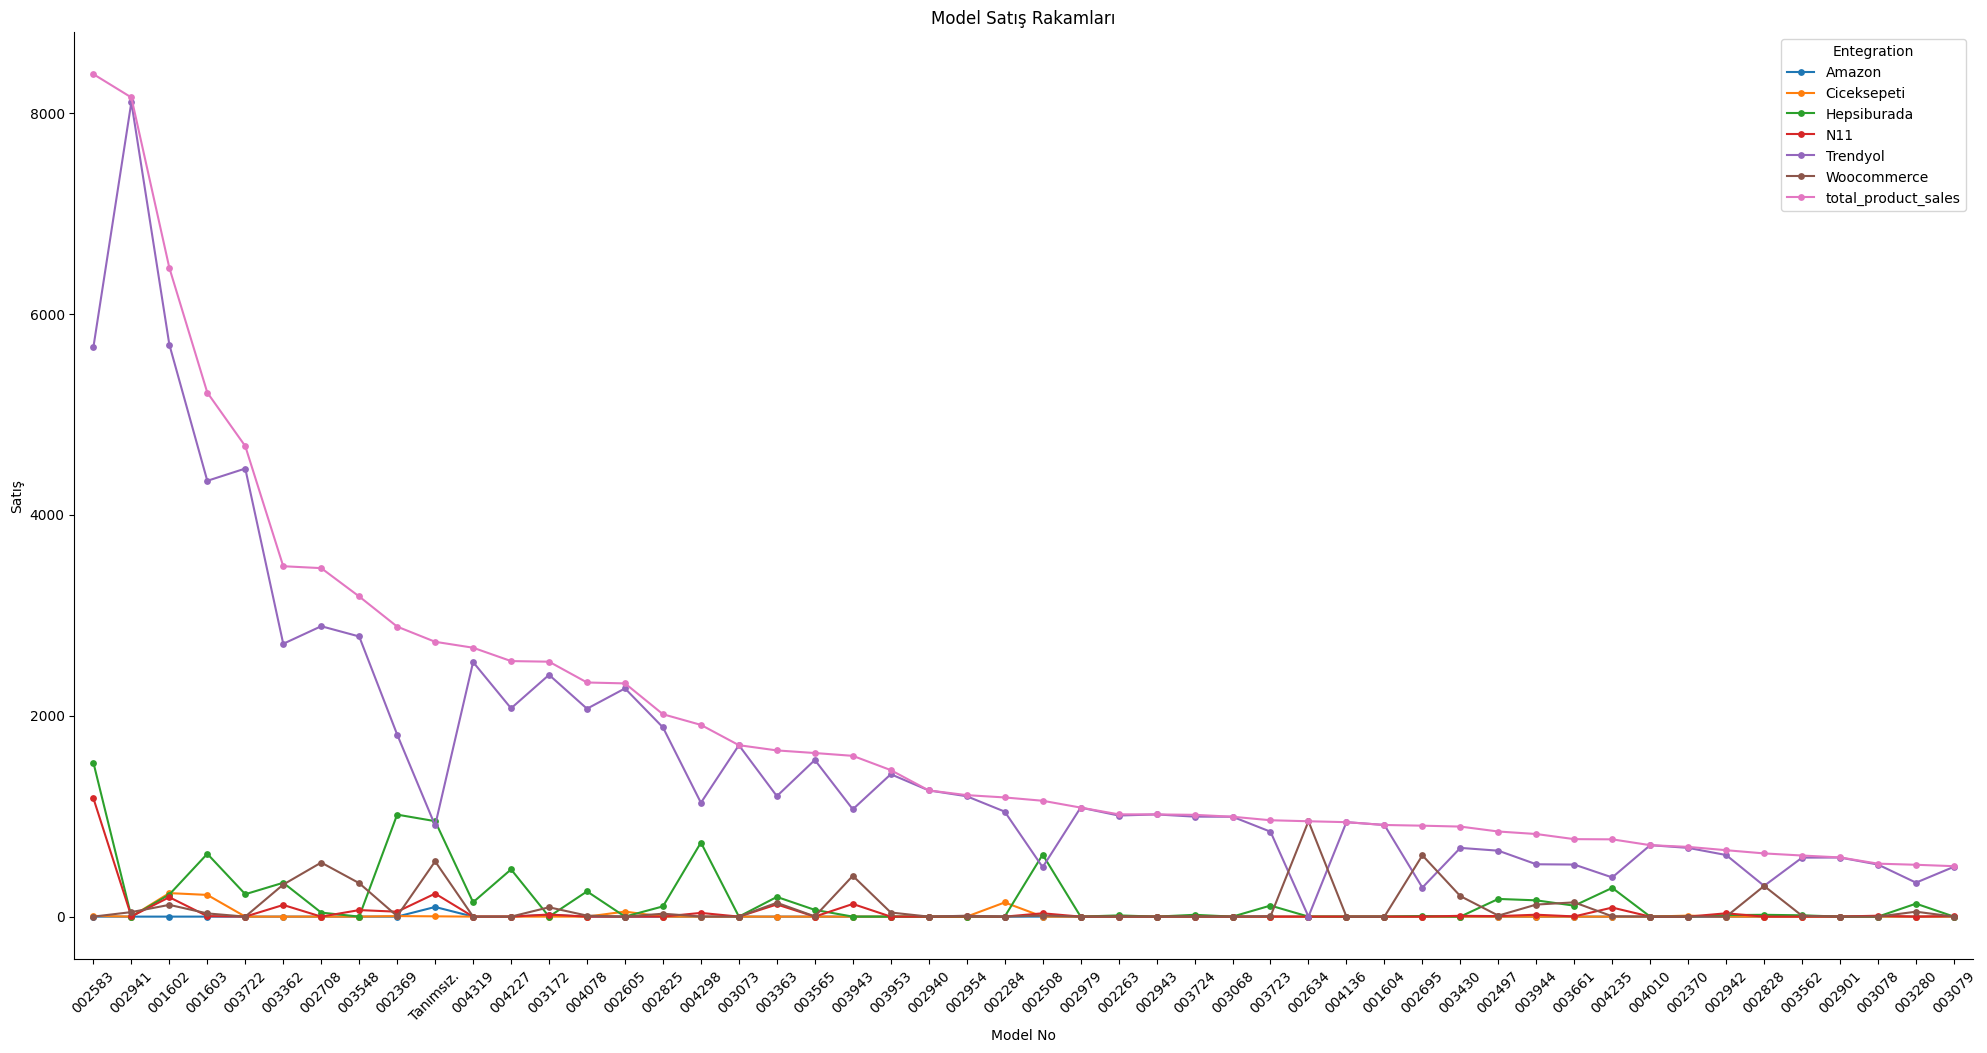

In [163]:
plt.figure(figsize=(16,9),dpi=100)
graph = sns.catplot(x="model", y="vals", hue='cols', data=dfm_select, kind='point', legend_out=False, height=10, aspect=2, linewidth=1.5)
# sns.pointplot(x="model", y="vals", hue='cols', data=dfm_select)
plt.xlabel("Model No")
plt.xticks(rotation=45)
plt.ylabel("Satış")
plt.title("Model Satış Rakamları")
plt.legend(title='Entegration', loc='upper right',);

##### Cancel Order

In [94]:
df_entegra_select["status_name"].unique()

array(['Onaylandı', 'Yeni Siparis', 'İade-İptal'], dtype=object)

In [95]:
df_entegra_select_cancel = df_entegra_select[(df_entegra_select["status_name"] == "İade-İptal")]
df_entegra_select_cancel.reset_index(drop=True, inplace=True)
df_entegra_select_cancel

,model,product_name,datetime,total_product_quantity,entegration,invoice_city,invoice_country,total,tax,grand_total,cargo_company,status_name
0,003952,"Awox Mercan Kettle Pembe, Mercan Kettle 1,7 Li...",2024-07-11 00:43:35,1,Trendyol,Kars,Türkiye,230.83,46.17,277.00,Trendyolekspress,İade-İptal
1,003944,"Katlanabilir Bebek Yıkama Küvet Seti 7 Parça, ...",2024-07-10 18:59:25,1,Trendyol,Adana,Türkiye,658.33,131.67,790.00,Trendyolekspress,İade-İptal
2,003661,Kırmızı Kulplu Eğitici Ahşap Montessori Ledli ...,2024-07-10 18:42:29,1,Trendyol,İzmir,Türkiye,2041.67,408.33,2450.00,Trendyolekspress,İade-İptal
3,001603,"Ahşap Özel İsim Baskılı, Kare Kedi Köpek Mama ...",2024-07-10 17:27:22,1,Trendyol,Bursa,Türkiye,154.17,30.83,185.00,Trendyolekspress,İade-İptal
4,001602,"Ahşap Özel İsim Baskılı, Oval Kedi Köpek Mama ...",2024-07-10 17:23:27,1,Trendyol,İzmir,Türkiye,154.17,30.83,185.00,Trendyolekspress,İade-İptal
...,...,...,...,...,...,...,...,...,...,...,...,...
2395,003661,Kırmızı Kulplu Eğitici Ahşap Montessori Mutfak...,2024-01-01 19:27:16,1,Trendyol,Bursa,Türkiye,1250.00,250.00,1500.00,Trendyolekspress,İade-İptal
2396,002413,"Çg108 Siyah Ahşap Ledli Çocuk Mutfağı Siyah, A...",2024-01-01 17:05:12,1,Trendyol,Bursa,Türkiye,1833.33,366.67,2200.00,Trendyolekspress,İade-İptal
2397,001602,"Pikas Ahşap Özel İsim Baskılı, Oval Kedi Köpek...",2024-01-01 15:59:00,3,Trendyol,Balıkesir,Türkiye,237.53,40.09,277.62,Trendyolekspress,İade-İptal
2398,002857,Brillahome Petek Desenli Dijital Baskı Pamuk T...,2024-01-01 14:48:15,1,Trendyol,Ankara,Türkiye,150.00,15.00,165.00,Trendyolekspress,İade-İptal


In [96]:
entegration_list_all = list(df_entegra_select["entegration"].unique())
entegration_list_all

['Trendyol', 'Hepsiburada', 'N11', 'Ciceksepeti', 'Woocommerce', 'Amazon']

In [97]:
entegration_list_cancel = list(df_entegra_select_cancel["entegration"].unique())
entegration_list_cancel

['Trendyol']

In [98]:
df_cancel_quantity_entegration = pd.pivot_table(index="model",columns="entegration", values="total_product_quantity", aggfunc='sum', data=df_entegra_select_cancel)
df_cancel_quantity_entegration = df_cancel_quantity_entegration.fillna(0)
df_cancel_quantity_entegration.reset_index(inplace=True)
df_cancel_quantity_entegration

entegration,model,Trendyol
0,000622,1
1,000688,4
2,000697,2
3,000699,2
4,000801,2
...,...,...
330,004374,6
331,004375,4
332,004388,2
333,004442,1


In [99]:
df_cancel_quantity_entegration = df_cancel_quantity_entegration.rename_axis(None, axis=1)  # del index name
df_cancel_quantity_entegration

,model,Trendyol
0,000622,1
1,000688,4
2,000697,2
3,000699,2
4,000801,2
...,...,...
330,004374,6
331,004375,4
332,004388,2
333,004442,1


In [100]:
for entegration in entegration_list_all:
    if entegration not in entegration_list_cancel:
        df_cancel_quantity_entegration[f"{entegration}"] = 0
    else:
        pass
    
df_cancel_quantity_entegration

,model,Trendyol,Hepsiburada,N11,Ciceksepeti,Woocommerce,Amazon
0,000622,1,0,0,0,0,0
1,000688,4,0,0,0,0,0
2,000697,2,0,0,0,0,0
3,000699,2,0,0,0,0,0
4,000801,2,0,0,0,0,0
...,...,...,...,...,...,...,...
330,004374,6,0,0,0,0,0
331,004375,4,0,0,0,0,0
332,004388,2,0,0,0,0,0
333,004442,1,0,0,0,0,0


In [101]:
# 1 way
# df_cancel_quantity_entegration["total_product_cancel"] = 0
# for entg_column in entegration_list_all:
#     df_cancel_quantity_entegration["total_product_cancel"] += df_cancel_quantity_entegration[f"{entg_column}"]
# 2 way
df_cancel_quantity_entegration["total_product_cancel"] = df_cancel_quantity_entegration[entegration_list_all].sum(axis=1)

df_cancel_quantity_entegration

,model,Trendyol,Hepsiburada,N11,Ciceksepeti,Woocommerce,Amazon,total_product_cancel
0,000622,1,0,0,0,0,0,1
1,000688,4,0,0,0,0,0,4
2,000697,2,0,0,0,0,0,2
3,000699,2,0,0,0,0,0,2
4,000801,2,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...
330,004374,6,0,0,0,0,0,6
331,004375,4,0,0,0,0,0,4
332,004388,2,0,0,0,0,0,2
333,004442,1,0,0,0,0,0,1


In [102]:
# df_cancel_quantity_entegration["total_product_cancel"] = df_cancel_quantity_entegration["Amazon"] + df_cancel_quantity_entegration["Ciceksepeti"] + \
#     df_cancel_quantity_entegration["Hepsiburada"] + df_cancel_quantity_entegration["N11"] + df_cancel_quantity_entegration["Trendyol"] + df_cancel_quantity_entegration["Woocommerce"]
# df_cancel_quantity_entegration

In [103]:
df_cancel_name_quantity_entegration  = pd.merge(df_cancel_quantity_entegration, df_entegra_select_product, how="left", on="model")
df_cancel_name_quantity_entegration.drop_duplicates(inplace=True)
df_cancel_name_quantity_entegration

,model,Trendyol,Hepsiburada,N11,Ciceksepeti,Woocommerce,Amazon,total_product_cancel,product_name
0,000622,1,0,0,0,0,0,1,Classone Wg100 Gaming Kablosuz Mouse Siyah
1,000688,4,0,0,0,0,0,4,"Hobby Life Alaska Nofrost Saklama Kabı 0,65 Li..."
2,000697,2,0,0,0,0,0,2,"Hobby Life Alaska Nofrost Saklama Kabı 1,85 Li..."
3,000699,2,0,0,0,0,0,2,"Hobby Life Alaska Nofrost Saklama Kabı 1,85 Li..."
4,000801,2,0,0,0,0,0,2,Natureva Çörekotu Yağı 10 Ml
...,...,...,...,...,...,...,...,...,...
358,004374,6,0,0,0,0,0,6,Awox Kıyma Makinası Et Çekme Makinası Sucuk So...
359,004375,4,0,0,0,0,0,4,Awox Vıte Pe330 Kıyma Makinesi
360,004388,2,0,0,0,0,0,2,100 Adet Pratik Tazeliği Koruyan Tencere Ve Ta...
361,004442,1,0,0,0,0,0,1,Bakır Görünümlü Çelik Sahan Seti Omlet Yumurta...


In [105]:
# df_cancel_name_quantity_entegration[[df_cancel_name_quantity_entegration.columns[-1]]]

In [107]:
cols = list(df_cancel_name_quantity_entegration.columns)
cols = [cols[-1]] + cols[:-1]
df_cancel_name_quantity_entegration = df_cancel_name_quantity_entegration[cols]
df_cancel_name_quantity_entegration

,product_name,model,Trendyol,Hepsiburada,N11,Ciceksepeti,Woocommerce,Amazon,total_product_cancel
0,Awox Dual Elektrikli Çay Makinesi Beyaz-Kırmızı,004227,276,0,0,0,0,0,276
1,"Portatif Katlanabilir Masa, Piknik Masası, Kam...",002583,267,0,0,0,0,0,267
2,"Portatif Katlanabilir Masa, Piknik Masası, Bal...",002583,267,0,0,0,0,0,267
3,Alas Çok Amaçlı Baza Kutusu Bej Çizgili Tekli ...,002941,239,0,0,0,0,0,239
4,"Pikas Ahşap Özel İsim Baskılı, Oval Kedi Köpek...",001602,198,0,0,0,0,0,198
...,...,...,...,...,...,...,...,...,...
358,"1300 Derece Profesyonel Pürmüz Kafa, Pürmüz Ba...",0034301,1,0,0,0,0,0,1
359,Çocuk Oyun Etkinlik Çalışma Masası Aktivite Ma...,003431,1,0,0,0,0,0,1
360,Eternity Fitilli Peluş Tek Kişilik Nevresim Ta...,003485,1,0,0,0,0,0,1
361,"Kedi Köpek Yuvarlak Yatak Peluş, Kedi Köpek Ya...",003489,1,0,0,0,0,0,1


In [108]:
df_cancel_name_quantity_entegration = df_cancel_name_quantity_entegration.sort_values(by="total_product_cancel", ascending=False)
df_cancel_name_quantity_entegration.reset_index(drop=True, inplace=True)
df_cancel_name_quantity_entegration

,product_name,model,Trendyol,Hepsiburada,N11,Ciceksepeti,Woocommerce,Amazon,total_product_cancel
0,Awox Dual Elektrikli Çay Makinesi Beyaz-Kırmızı,004227,276,0,0,0,0,0,276
1,"Portatif Katlanabilir Masa, Piknik Masası, Bal...",002583,267,0,0,0,0,0,267
2,"Portatif Katlanabilir Masa, Piknik Masası, Kam...",002583,267,0,0,0,0,0,267
3,Alas Çok Amaçlı Baza Kutusu Bej Çizgili Tekli ...,002941,239,0,0,0,0,0,239
4,"Pikas Ahşap Özel İsim Baskılı, Oval Kedi Köpek...",001602,198,0,0,0,0,0,198
...,...,...,...,...,...,...,...,...,...
358,"Aralıklı Plastik Kedi Kumu Küreği,Temizleme El...",002957,1,0,0,0,0,0,1
359,"Siyah Ceviz Mdf Ağaç Saat, Duvar Saati 40X40 C...",002911,1,0,0,0,0,0,1
360,"Baby 6 Lı Seyahat Seti / Hurcu, Bavul Düzenley...",002899,1,0,0,0,0,0,1
361,"6'Lı Ahşap Kukla Aile Seti, Kukla Seti",002886,1,0,0,0,0,0,1


In [109]:
df_cancel_name_quantity_entegration_drop = df_cancel_name_quantity_entegration.drop_duplicates(subset="model")
df_cancel_name_quantity_entegration_drop.reset_index(drop=True, inplace=True)
df_cancel_name_quantity_entegration_drop

,product_name,model,Trendyol,Hepsiburada,N11,Ciceksepeti,Woocommerce,Amazon,total_product_cancel
0,Awox Dual Elektrikli Çay Makinesi Beyaz-Kırmızı,004227,276,0,0,0,0,0,276
1,"Portatif Katlanabilir Masa, Piknik Masası, Bal...",002583,267,0,0,0,0,0,267
2,Alas Çok Amaçlı Baza Kutusu Bej Çizgili Tekli ...,002941,239,0,0,0,0,0,239
3,"Pikas Ahşap Özel İsim Baskılı, Oval Kedi Köpek...",001602,198,0,0,0,0,0,198
4,"Awox Nova Kettle Beyaz, 2000 W 1.7 Lt Su Isıtı...",003953,155,0,0,0,0,0,155
...,...,...,...,...,...,...,...,...,...
330,"Aralıklı Plastik Kedi Kumu Küreği,Temizleme El...",002957,1,0,0,0,0,0,1
331,"Siyah Ceviz Mdf Ağaç Saat, Duvar Saati 40X40 C...",002911,1,0,0,0,0,0,1
332,"Baby 6 Lı Seyahat Seti / Hurcu, Bavul Düzenley...",002899,1,0,0,0,0,0,1
333,"6'Lı Ahşap Kukla Aile Seti, Kukla Seti",002886,1,0,0,0,0,0,1


In [107]:
df_cancel_name_quantity_entegration_drop.to_excel(fr"{output_path}\Entegra_Pazaryeri_İptal_Rakamları.xlsx", index=False)

In [ ]:
df_cancel_dublicated_entegration = df_cancel_name_quantity_entegration[df_cancel_name_quantity_entegration.duplicated(subset="model", keep=False)]
df_cancel_dublicated_entegration

In [ ]:
df_cancel_dublicated_entegration.to_excel(fr"{output_path}\Entegra_Pazaryeri_iptal_Rakamları_Yenile.xlsx", index=False)

##### Add Cancel Order To Sales